In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as ny

In [51]:
df=pd.read_csv("rolling_stones_spotify.csv")

In [52]:
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,6/10/2022,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,6/10/2022,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,6/10/2022,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,6/10/2022,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,6/10/2022,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [54]:
df.describe()

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,804.500000,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,464.911282,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,0.000000,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,402.250000,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,804.500000,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,1206.750000,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,1609.000000,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


In [55]:
#Consider a song is popular if popularity is greater than 40
aggregated = df.groupby("album").agg(
    Total_popular=("popularity", lambda x: x[x >= 40].sum()),  
    Mean_Popular=("popularity", lambda x: x[x >= 40].mean()),                     
    Count_Popular=("popularity", lambda x: x[x >= 40].count()),   
    Total=("popularity", "sum"),  
    Mean=("popularity", "mean"),                     
    Count=("popularity", "count")        
)
aggregated

,Total_popular,Mean_Popular,Count_Popular,Total,Mean,Count
album,,,,,,
12 X 5,88,44.000000,2,385,32.083333,12
12 x 5,0,NaN,0,60,5.000000,12
A Bigger Bang (2009 Re-Mastered),86,43.000000,2,433,27.062500,16
A Bigger Bang (Live),0,NaN,0,400,18.181818,22
Aftermath,188,62.666667,3,474,43.090909,11
...,...,...,...,...,...,...
Undercover,0,NaN,0,180,18.000000,10
Undercover (2009 Re-Mastered),42,42.000000,1,251,25.100000,10
Voodoo Lounge (Remastered 2009),139,46.333333,3,510,34.000000,15


In [56]:
# If 70% of total songs in album is popular then recomend
aggregated['Percentage_Popular'] = aggregated['Count_Popular'] / aggregated['Count'] * 100

In [71]:
# Sort by Percentage_Popular in descending order
aggregated = aggregated.sort_values(by=["Total_popular","Percentage_Popular"], ascending=False)
album_popular_counts=aggregated[aggregated["Percentage_Popular"]>50]
album_popular_counts.head(3)

,Total_popular,Mean_Popular,Count_Popular,Total,Mean,Count,Percentage_Popular
album,,,,,,,
Exile On Main Street (2010 Re-Mastered),647,46.214286,14,795,44.166667,18,77.777778
Sticky Fingers (Remastered),533,53.300000,10,533,53.300000,10,100.000000
Some Girls,405,50.625000,8,481,48.100000,10,80.000000


C:\Users\Ankur Goyal\AppData\Local\Temp\ipykernel_2224\1310039842.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Count")


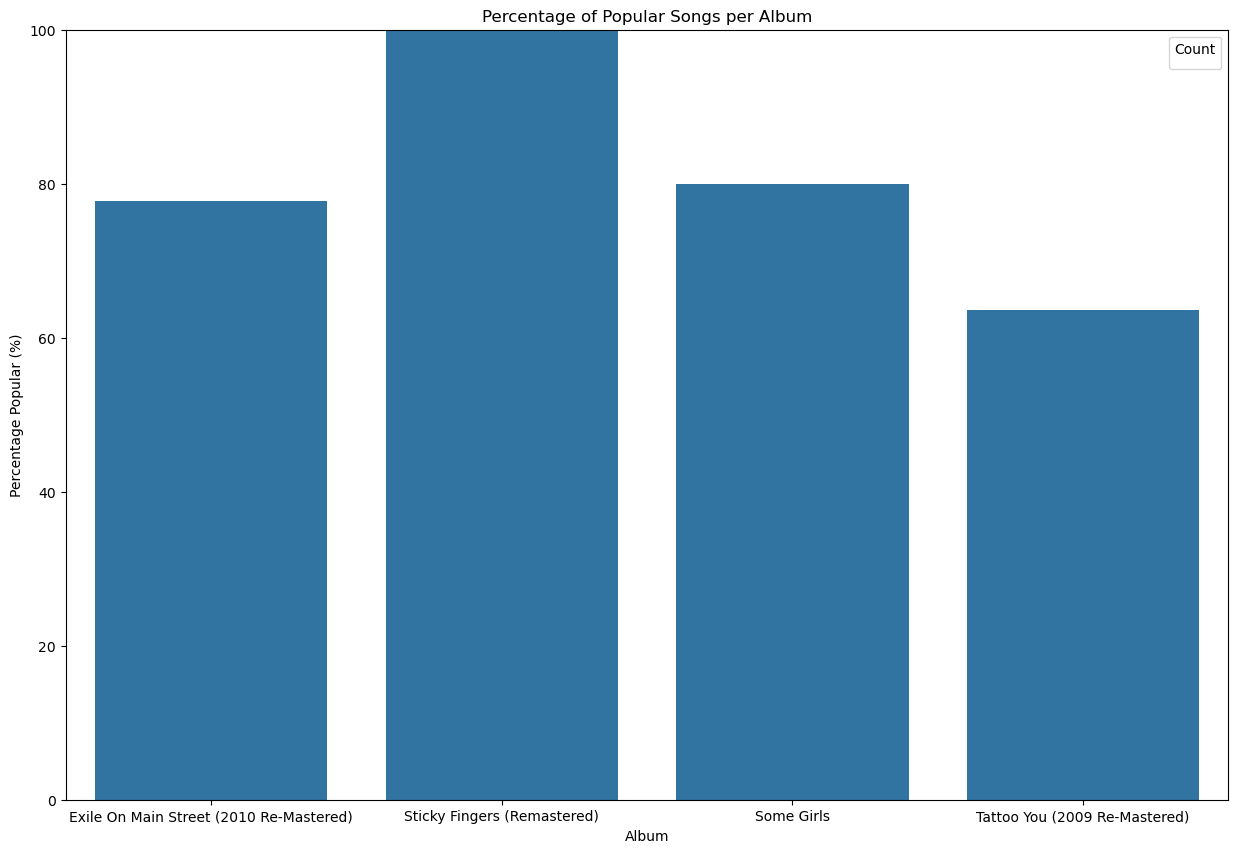

In [77]:
# Plot a bar graph using seaborn
plt.figure(figsize=(15, 10))
sns.barplot(
    data=album_popular_counts,
    x="album",
    y="Percentage_Popular" # Recommended albums in green
)
plt.title("Percentage of Popular Songs per Album")
plt.xlabel("Album")
plt.ylabel("Percentage Popular (%)")
plt.ylim(0, 100)  # Set the y-limit from 0 to 100
plt.legend(title="Count")
plt.show()

In [ ]:
# Popular albums are Exile On Main Street (2010 Re-Mastered) & Sticky Fingers (Remastered)